# DAE Correlation and Regression

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals
After working your way through this notebook you should be able to..
- Explain what correlation can measure and when it is useful
- Explain what the Pearson correlation coefficient is
- Explain when correlation should and should not be used

## Table of Contents
- [1 Relationship between Variables](#Relationships)  
- [2 Covariance](#Covariance)
- [3 Correlation Coefficient](#Coefficient)
- [4 Linear Regression](#Regression)


<a id= 'Summarizing'> </a>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

<a id= 'Relationships'> </a>

### 1. Relationship between Variables

We are often interested in seeing whether independent and dependent variables have some kind of relationship with each other or among themselves. A good way to study this is to plot the concerned variables against each other. 

In [13]:
# In this example we have data from 18 participants and two rating scales (0-100)

data= pd.DataFrame([[83,37],
       [93,23],
       [60,40],
       [47,16],
       [59,59],
       [77,34],
       [30,21],
       [75,45],
       [86,91],
       [100,75],
       [71,0],
       [85,100],
       [75,20],
       [55,38],
       [47,20], 
       [40,37],
       [72,48],                    
       [100,90]], 
       columns=(["Scale1","Scale2"]), 
       index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# Check dimensions of the data structure
data.describe()

,Scale1,Scale2
count,18.000000,18.000000
mean,69.722222,44.111111
std,20.415696,28.445798
min,30.000000,0.000000
25%,56.000000,21.500000
50%,73.500000,37.500000
75%,84.500000,56.250000
max,100.000000,100.000000


### Try out 1:
Plot the variables against each other in the form of a scatter plot to see if there is a relationship between them (Scale1 and Scale2).

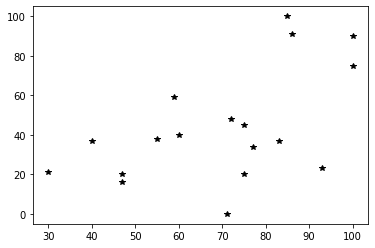

In [11]:
# Is there a relationship between the two variables (Scale1 and Scale2)?
plt.plot(data.iloc[:,0], data.iloc[:,1], 'k*')

The scatter plot indicates a tendency for high ratings on one scale to be accompanied by high ratings on the other, and vice versa. But how do we quantify this tendency?

<a id= 'Covariance'> </a>

## 2. Covariance

In the case of the variance of one variable, we summed the squared distance between each observation and the mean. To see whether two variables x and y *covary* (vary similarly), we apply a similar formula: 

$$cov(x,y)  =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {N-1}$$

N is the sample size. 
$\bar{x},\bar{y}$ are the means of x and y respectively, while $x_i,y_i$ are the data points. 

In general, if $x_i$ exceeds $\bar{x}$, and $y_i$ simultaneously exceeds $\bar{y}$ (and vice versa), this will result in a *positive* covariance value. This means that x and y vary similarly.

**Note that this does not mean that a change in x *causes* y to vary!**

In [14]:
# Get the covariance matrix of the whole data
data.cov()

# 

,Scale1,Scale2
Scale1,416.800654,317.562092
Scale2,317.562092,809.163399


### Try out 2:
Calculate the mean of the two scales and add as another variable "Scale 3" in the data frame. Calculate the covariance matrix and compare. 

In [12]:
# Add another variable consisting of the mean data of Scale1 and Scale2
#data['Scale3']=(data.Scale1 + data.Scale2)/2
#data

# calculate covariance matrix
#data.cov()

<a id= 'Coefficient'> </a>

## 3. Correlation coefficient

The Pearson Product-Moment Correlation Coefficient (r, or "correlation coefficient" for short) is a standardized measure of the linear relationship between two variables. The degree to which the relationship
can be explained by a linear model is expressed by the coefficient, r.

Departing from the covariance, the equation for the coefficient can be written as

$$r =  \frac {cov_{xy}} {s_x s_y} =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {(N-1){s_x s_y}}$$

Where $s_x$ and $s_y$ are the sample standard deviations for x and y. Dividing the covariance with them gives a value which can be interpreted as follows:

If r = 1, x and y are positively correlated (perfectly)

If r = -1, x and y are negatively correlated (perfectly)

If r = 0, x and y have no linear correlation

If r > 0 and r < 1, x and y are positively correlated (but not perfectly)

If r < 0 and r > -1, x and y are negatively correlated (but not perfectly)






In [8]:

data.corr()

,Scale1,Scale2
Scale1,1.000000,0.546822
Scale2,0.546822,1.000000


Just as in the covariance matrix, r(Scale1,Scale2) is the same as r(Scale2,Scale1) and the diagonal is all 1. In literature, you may frequently see correlation matrixes where the numbers above the diagonal are omitted. 

By calculating the correlation coefficient for different ratings of the same stimuli, it is possible to judge how *reliable* the measure is. For instance, it can show the degree to which participants tend to rate a stimulus the same way when presented with it several times. 

If $r$ is close to 1, it implies that the measure is reliable, as the ratings of the same stimulus show small variability.

If $r$ is close to 0, it implies that the measure is unreliable and noisy, i.e. with large variability.


### Try out 3:
When converting analog signals to digital, there are limited values that can be represented in the computer. 
In this case, we have data from a distance sensor, the produced voltage output (analog), and the converted ADC (digital) value. Plot the two latter and calculate their correlation coefficient.


(31, 3)


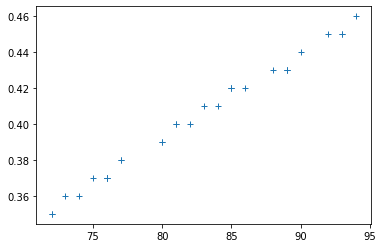

In [10]:
# Here is an excerpt from the data:
array=np.array([[1200,94,0.46],
[1210,93,0.45],
[1220,93,0.45],
[1230,92,0.45],
[1240,90,0.44],
[1250,89,0.43],
[1260,89,0.43],
[1270,89,0.43],
[1280,88,0.43],
[1290,86,0.42],
[1300,85,0.42],
[1310,85,0.42],
[1320,85,0.42],
[1330,84,0.41],
[1340,83,0.41],
[1350,82,0.40],
[1360,81,0.40],
[1370,81,0.40],
[1380,80,0.39],
[1390,80,0.39],
[1400,77,0.38],
[1410,77,0.38],
[1420,76,0.37],
[1430,76,0.37],
[1440,76,0.37],
[1450,76,0.37],
[1460,75,0.37],
[1470,74,0.36],
[1480,73,0.36],
[1490,72,0.35],
[1500,72,0.35]])

# And to make it convenient we put this in a data frame with index for the participants
index = [f'participant_{num}' for num in range(array.shape[0])] #generate row index for all entries

sensor= pd.DataFrame(array, columns=(["Distance","ADC", "Voltage"]), index=index)

#check the format of data frame
print(sensor.shape)

sensor.describe()

#one way to plot
plt.plot(sensor.ADC, sensor.Voltage, '+')

#calculate correlation as above

As expected (and hoped for), the values are highly correlated. 

<a id= 'Regression'> </a>

## 4. Linear Regression

The relationship between $x$ and $y$ can be modelled using a straight line equation that expresses $y$ in terms of $x$. In other words, variable $y$ is predicted by $x$ in terms of a linear relationship between the two. The method finds the straight line that best fits the data points, and expresses it as follows:

$$y=a+bx$$

Where the constant $a$ is the *intercept* (the value of $y$ when $x=0$), and the constant $b$ is a measure of the *inclination* (the "steepness" or "slope" or "gradient" of the line). 



For instance, if we want use the distance sensor in an application to measure distance, it would be far simpler if we know how the ADC values correspond to physical distance (mm). One way is to plot the values.


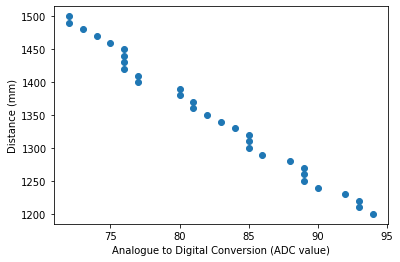

In [ ]:
plt.scatter(sensor.ADC,sensor.Distance)
plt.xlabel('Analogue to Digital Conversion (ADC value)')
plt.ylabel('Distance (mm)')
plt.show()

 But more convenient would be to make a model using linear regression and *fit* a line to the points. 

### Try out 4:
Apply a linear fit, print the output and identify a and b in the equation
 $Distance= a*ADC + b$

In [14]:
distmodel=np.polyfit(sensor.ADC,sensor.Distance,1)

# 1st order polynomial = Line, for more info see:
# help(np.polyfit)

print(distmodel)  
# for  decrease of 1 ADC the corresponding distance increases by... (first number)
# for  0 ADC output the corresponding distance would be... (second)

[ -13.35905977 2450.18321291]


It is important to check whether the output of the model makes sense in relation to the data. 

We can also check the prediction of our model by producing values according to it, and plot it with the original data.

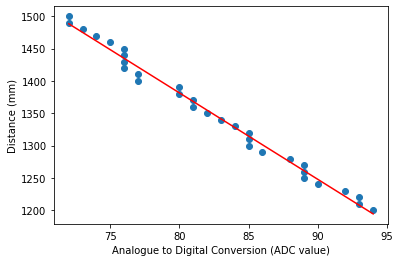

In [13]:
Distpred=np.poly1d(distmodel) # construct predicted output based on model

D_lin_reg=Distpred(sensor.ADC)
plt.scatter(sensor.ADC,sensor.Distance)
plt.plot(sensor.ADC,D_lin_reg, c='r')

plt.xlabel('Analogue to Digital Conversion (ADC value)')
plt.ylabel('Distance (mm)')
plt.show()

The regression model, and prediction of data based on it, is a fundamental concept of machine learning. In reality though, the data and models are often much more complex. 

It is important to stress that both correlation and linear regression express the *LINEAR* relationship between variables. There can be other, non-linear relationships in data that we should not use these methods for.

In the above plot, we have quite a good fit. But in our example, we have only used a only a small portion of the sensor range.  
We could use the full data available and see whether our model would also be useful for other ranges.

### Try out 5:
Get the full data (DistanceSensorData.csv,  https://lucidar.me/en/arduino/files/SHARP_Distance_Sensors.zip from https://lucidar.me/en/arduino/arduino-accurate-distance-measurement-sharp-GP2Y0A21YK/)
Load it and plot. Would it be suitable to perform a linear regression on the data? 

In [1]:
#Load the data. You can use pd.read_csv like the suggstion here:
# Sharp = pd.read_csv('DistanceSensorData.csv', delimiter = '\t',names=('Distance', 'ADC','Voltage'))

# remember to check shape and content of the data frame once loaded

# see what the correlation function and linear regression would put out.